In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import IPython
import mlflow

In [2]:
!pwd

/c/Users/yacin/Desktop/DATA SCIENCE OPENCLASSROOMS/Projet 12/notebooks


In [3]:
crop_yield = pd.read_csv('../datasets/crop_yield.csv', sep=',') 

In [4]:
pesticides = pd.read_csv('../datasets/pesticides.csv', sep=',') 

In [5]:
rainfall = pd.read_csv('../datasets/rainfall.csv', sep=',') 

In [6]:
temp = pd.read_csv('../datasets/temp.csv', sep=',') 

In [7]:
yield_df = pd.read_csv('../datasets/yield_df.csv', sep=',') 

In [8]:
yield_1 = pd.read_csv('../datasets/yield.csv', sep=',') 

# Analyse exploratoires des datasets

In [9]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [10]:
list_1 = {
    "crop_yield": crop_yield,
    "pesticides": pesticides,
    "rainfall": rainfall,
    "temp": temp,
    "yield_df": yield_df,
    "yield_1": yield_1
}

In [11]:
#Head
for name, df in list_1.items() : 
    print(f"--- {name} ---")
    print(df.head())
    print()

--- crop_yield ---
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4    

In [12]:
#INFO
for name, df in list_1.items() : 
    print(f"--- {name} ---")
    display(df.info())
    print()

--- crop_yield ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


None


--- pesticides ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


None


--- rainfall ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


None


--- temp ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


None


--- yield_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


None


--- yield_1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


None

In [13]:
#ISNA
for name, df in list_1.items() : 
    print(f"--- {name} ---")
    display(df.isna().mean())
    print()

--- crop_yield ---


Region                    0.0
Soil_Type                 0.0
Crop                      0.0
Rainfall_mm               0.0
Temperature_Celsius       0.0
Fertilizer_Used           0.0
Irrigation_Used           0.0
Weather_Condition         0.0
Days_to_Harvest           0.0
Yield_tons_per_hectare    0.0
dtype: float64


--- pesticides ---


Domain     0.0
Area       0.0
Element    0.0
Item       0.0
Year       0.0
Unit       0.0
Value      0.0
dtype: float64


--- rainfall ---


 Area                            0.000000
Year                             0.000000
average_rain_fall_mm_per_year    0.115059
dtype: float64


--- temp ---


year        0.000000
country     0.000000
avg_temp    0.035717
dtype: float64


--- yield_df ---


Unnamed: 0                       0.0
Area                             0.0
Item                             0.0
Year                             0.0
hg/ha_yield                      0.0
average_rain_fall_mm_per_year    0.0
pesticides_tonnes                0.0
avg_temp                         0.0
dtype: float64


--- yield_1 ---


Domain Code     0.0
Domain          0.0
Area Code       0.0
Area            0.0
Element Code    0.0
Element         0.0
Item Code       0.0
Item            0.0
Year Code       0.0
Year            0.0
Unit            0.0
Value           0.0
dtype: float64

In [14]:
#DUPLICATED
for name, df in list_1.items() : 
    print(f"--- {name} ---")
    display(df.duplicated().sum())
    print()

--- crop_yield ---


np.int64(0)


--- pesticides ---


np.int64(0)


--- rainfall ---


np.int64(0)


--- temp ---


np.int64(6958)


--- yield_df ---


np.int64(0)


--- yield_1 ---


np.int64(0)

In [15]:
temp.duplicated().sum()

np.int64(6958)

In [16]:
temp

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [17]:
#clé de jointure pour les 5 derniers datasets : Area / Pays
#Pour le premier dataset Region différent de Area / Pays

In [18]:
#DESCRIBE
for name, df in list_1.items() : 
    print(f"--- {name} ---")
    display(df.describe())
    print()

--- crop_yield ---


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372



--- pesticides ---


,Year,Value
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06



--- rainfall ---


,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000



--- temp ---


,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000



--- yield_df ---


,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000



--- yield_1 ---


,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


In [19]:
#DESCRIBE OBJECT
for name, df in list_1.items() : 
    print(f"--- {name} ---")
    display(df.select_dtypes(include='object').describe())
    print()

--- crop_yield ---


,Region,Soil_Type,Crop,Weather_Condition
count,1000000,1000000,1000000,1000000
unique,4,6,6,3
top,North,Sandy,Maize,Sunny
freq,250173,167119,166824,333790



--- pesticides ---


,Domain,Area,Element,Item,Unit
count,4349,4349,4349,4349,4349
unique,1,168,1,1,1
top,Pesticides Use,Albania,Use,Pesticides (total),tonnes of active ingredients
freq,4349,27,4349,4349,4349



--- rainfall ---


,Area,average_rain_fall_mm_per_year
count,6727,5953
unique,217,173
top,Afghanistan,1010
freq,31,62



--- temp ---


,country
count,71311
unique,137
top,United States
freq,11973



--- yield_df ---


,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276



--- yield_1 ---


,Domain Code,Domain,Area,Element,Item,Unit
count,56717,56717,56717,56717,56717,56717
unique,1,1,212,1,10,1
top,QC,Crops,Democratic Republic of the Congo,Yield,Maize,hg/ha
freq,56717,56717,560,56717,8631,56717


## Nettoyage crop_yield

In [20]:
crop_yield["Fertilizer_Used"] = crop_yield["Fertilizer_Used"].astype(int)
crop_yield["Irrigation_Used"] = crop_yield["Irrigation_Used"].astype(int)

In [21]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  int64  
 6   Irrigation_Used         1000000 non-null  int64  
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 76.3+ MB


In [22]:
crop_yield.nunique()

Region                          4
Soil_Type                       6
Crop                            6
Rainfall_mm               1000000
Temperature_Celsius       1000000
Fertilizer_Used                 2
Irrigation_Used                 2
Weather_Condition               3
Days_to_Harvest                90
Yield_tons_per_hectare    1000000
dtype: int64

<Axes: title={'center': 'Yield_tons_per_hectare'}>

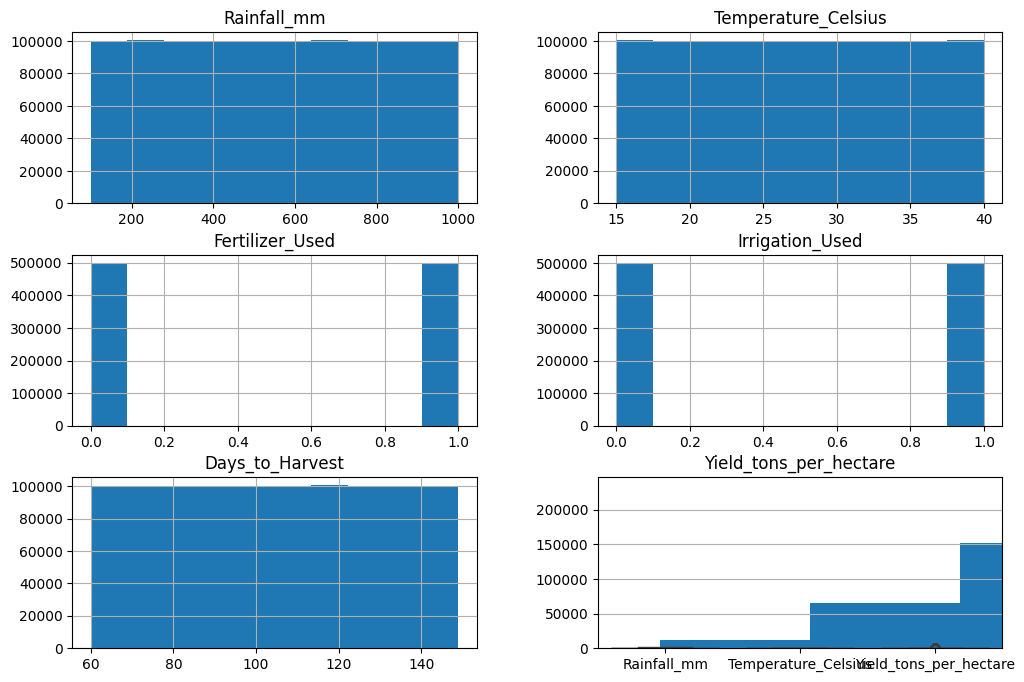

In [23]:
crop_yield.hist(figsize=(12,8))
sns.boxplot(data=crop_yield[["Rainfall_mm", "Temperature_Celsius", "Yield_tons_per_hectare"]])

<Axes: xlabel='Yield_tons_per_hectare'>

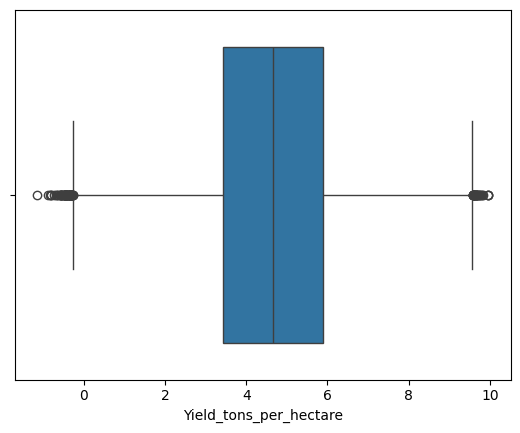

In [24]:
sns.boxplot(x=crop_yield["Yield_tons_per_hectare"])

<Axes: >

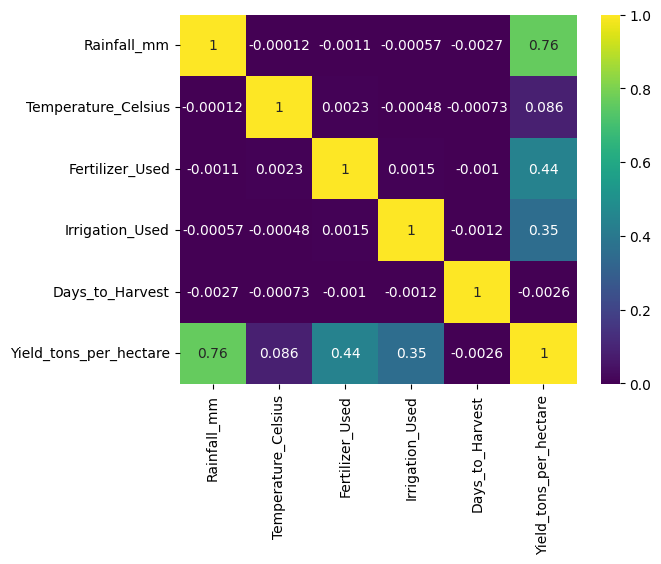

In [25]:
corr = crop_yield.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="viridis")

In [26]:
crop_yield = crop_yield[crop_yield['Yield_tons_per_hectare'] >= 0]
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999769 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  999769 non-null  object 
 1   Soil_Type               999769 non-null  object 
 2   Crop                    999769 non-null  object 
 3   Rainfall_mm             999769 non-null  float64
 4   Temperature_Celsius     999769 non-null  float64
 5   Fertilizer_Used         999769 non-null  int64  
 6   Irrigation_Used         999769 non-null  int64  
 7   Weather_Condition       999769 non-null  object 
 8   Days_to_Harvest         999769 non-null  int64  
 9   Yield_tons_per_hectare  999769 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 83.9+ MB


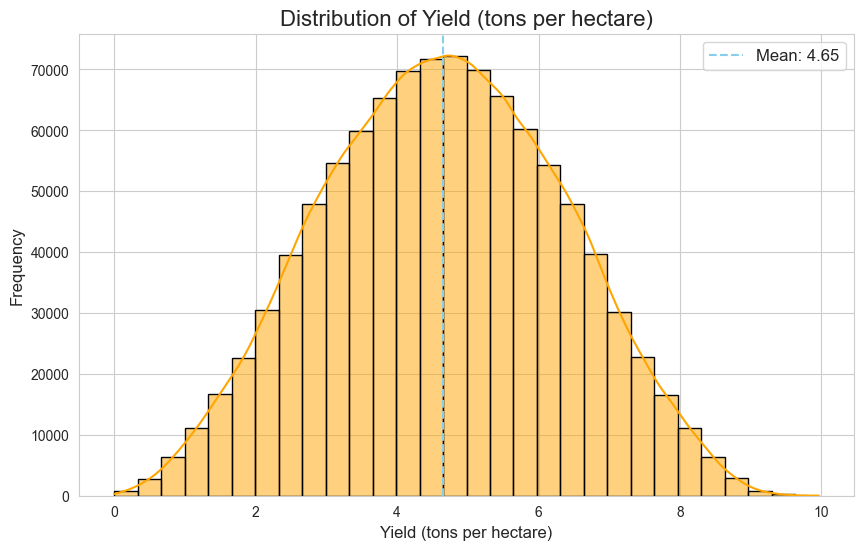

In [27]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(crop_yield['Yield_tons_per_hectare'], bins=30, kde=True, color="orange", edgecolor="black")
plt.axvline(crop_yield['Yield_tons_per_hectare'].mean(), color='skyblue', linestyle='--', linewidth=1.5, label=f"Mean: {crop_yield['Yield_tons_per_hectare'].mean():.2f}")

plt.title("Distribution of Yield (tons per hectare)", fontsize=16)
plt.xlabel("Yield (tons per hectare)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)

<Axes: xlabel='Rainfall_mm', ylabel='Yield_tons_per_hectare'>

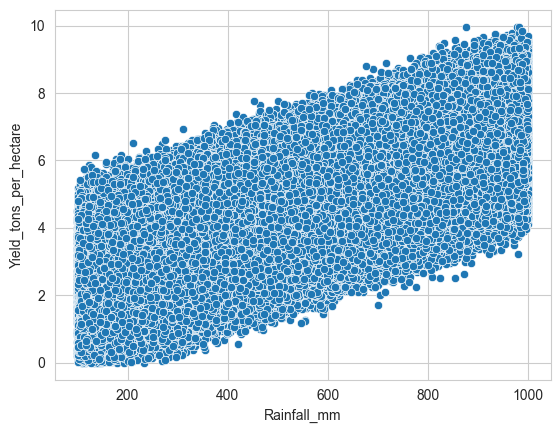

In [31]:
sns.scatterplot(x="Rainfall_mm", y="Yield_tons_per_hectare", data=crop_yield)

<Axes: xlabel='Fertilizer_Used', ylabel='Yield_tons_per_hectare'>

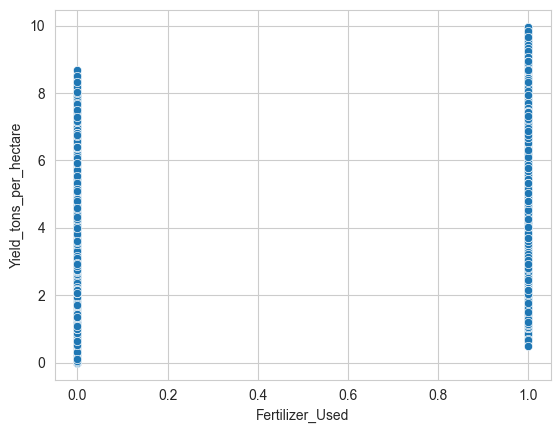

In [30]:
sns.scatterplot(x="Fertilizer_Used", y="Yield_tons_per_hectare", data=crop_yield)

## Nettoyage FAO

In [53]:
# Convertir en float
rainfall["average_rain_fall_mm_per_year"] = pd.to_numeric(
    rainfall["average_rain_fall_mm_per_year"],
    errors="coerce"
)

In [54]:
rainfall.isna().mean()

 Area                            0.000000
Year                             0.000000
average_rain_fall_mm_per_year    0.115951
dtype: float64

In [55]:
rainfall = rainfall.dropna()

In [56]:
rainfall = rainfall.rename(index=str, columns={" Area": 'Area'})

In [57]:
# rename columns.
yield_1 = yield_1.rename(index=str, columns={"Value": "hg/ha_yield"})
yield_1.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [58]:
# drop unwanted columns.
yield_1 = yield_1.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
yield_1.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [59]:
#merge yield_1 avec rainfall
yield_r = pd.merge(yield_1, rainfall, on=['Year','Area'])

In [60]:
yield_r.shape

(25385, 5)

In [61]:
pesticides = pesticides.rename(index=str, columns={"Value": "pesticides_tonnes"})
pesticides = pesticides.drop(['Element','Domain','Unit','Item'], axis=1)
pesticides.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [62]:
# merge Pesticides dataframe with yield dataframe 
yield_rp = pd.merge(yield_r, pesticides, on=['Year','Area'])
yield_rp.shape

(18949, 6)

In [63]:
temp = temp.rename(index=str, columns={"year": "Year", "country":'Area'})
temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [64]:
temp.isna().mean()

Year        0.000000
Area        0.000000
avg_temp    0.035717
dtype: float64

In [65]:
yield_rpt = pd.merge(yield_rp, temp, on=['Area','Year'])
yield_rpt.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


In [66]:
yield_rpt.shape

(28242, 7)

In [67]:
yield_rpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [68]:
yield_rpt.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [69]:
yield_rpt['Area'].nunique()

101

In [70]:
yield_rpt.groupby(['Area'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

In [71]:
yield_rpt.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

<Axes: >

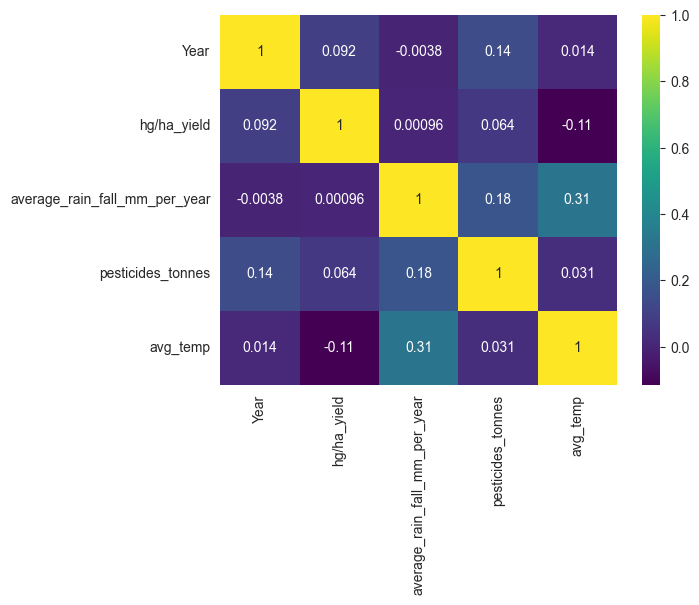

In [72]:
corr2 = yield_rpt.corr(numeric_only=True)
sns.heatmap(corr2, annot=True, cmap="viridis")

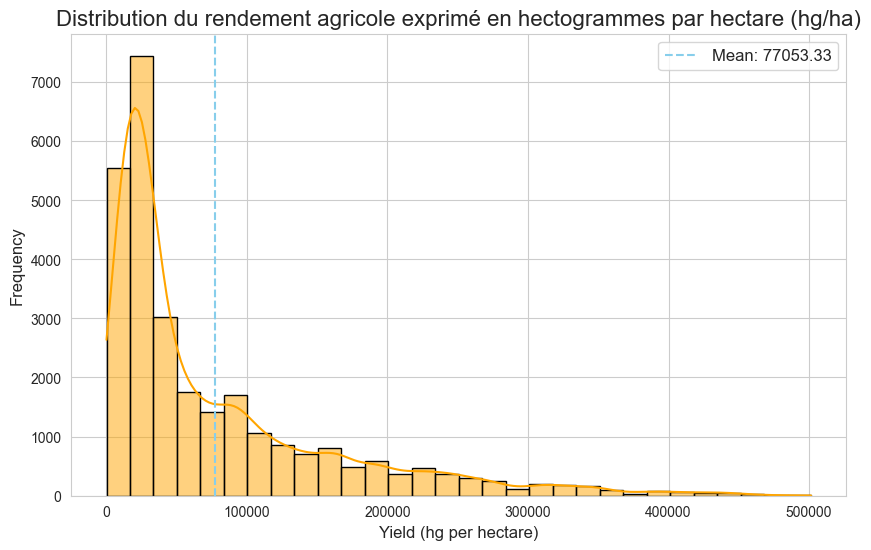

In [73]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(yield_rpt['hg/ha_yield'], bins=30, kde=True, color="orange", edgecolor="black")
plt.axvline(yield_rpt['hg/ha_yield'].mean(), color='skyblue', linestyle='--', linewidth=1.5, label=f"Mean: {yield_rpt['hg/ha_yield'].mean():.2f}")

plt.title("Distribution du rendement agricole exprimé en hectogrammes par hectare (hg/ha)", fontsize=16)
plt.xlabel("Yield (hg per hectare)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)

## Analyse PCA

In [74]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999769 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  999769 non-null  object 
 1   Soil_Type               999769 non-null  object 
 2   Crop                    999769 non-null  object 
 3   Rainfall_mm             999769 non-null  float64
 4   Temperature_Celsius     999769 non-null  float64
 5   Fertilizer_Used         999769 non-null  int64  
 6   Irrigation_Used         999769 non-null  int64  
 7   Weather_Condition       999769 non-null  object 
 8   Days_to_Harvest         999769 non-null  int64  
 9   Yield_tons_per_hectare  999769 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 83.9+ MB


In [75]:
crop_yield.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110,7.248251


In [76]:
# One-hot encoding
df_enc = pd.get_dummies(
    crop_yield,
    columns=["Region", "Soil_Type", "Crop", "Weather_Condition"],
    drop_first=True
)

# X et y
X = df_enc.drop(columns=["Yield_tons_per_hectare"])
y = df_enc["Yield_tons_per_hectare"]

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
pca = PCA(n_components=None, random_state=42)
pca.fit(X_scaled)

# Variance expliquée par composante
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

explained_variance[:5], cumulative_variance[:5]

(array([0.07504541, 0.0666846 , 0.06667272, 0.06015407, 0.06010128]),
 array([0.07504541, 0.14173001, 0.20840273, 0.2685568 , 0.32865808]))

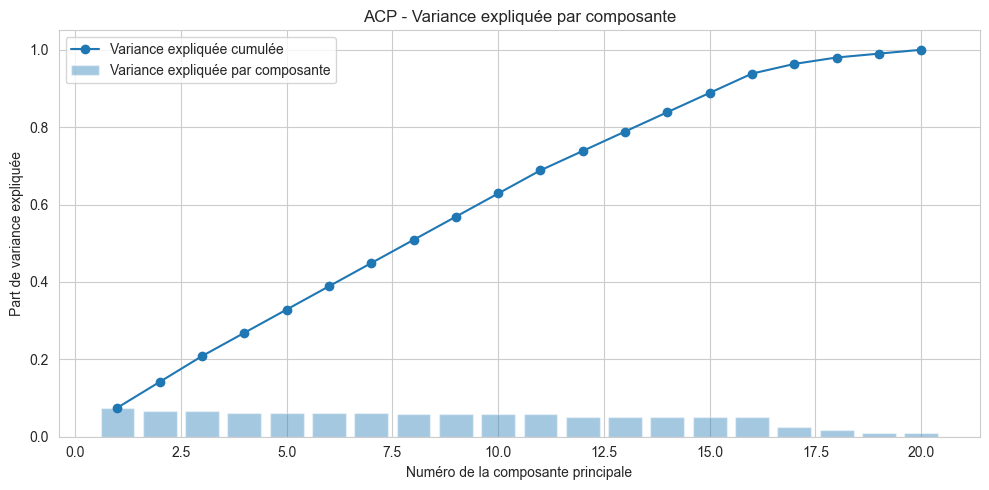

In [79]:
plt.figure(figsize=(10,5))

plt.plot(
    range(1, len(explained_variance) + 1),
    cumulative_variance,
    marker="o",
    label="Variance expliquée cumulée"
)
plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance,
    alpha=0.4,
    label="Variance expliquée par composante"
)

plt.xlabel("Numéro de la composante principale")
plt.ylabel("Part de variance expliquée")
plt.title("ACP - Variance expliquée par composante")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
# DataFrame des loadings (poids des variables dans chaque PC)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=X.columns
)

# Aperçu des variables qui contribuent le plus à PC1, PC2 et PC3
top_n = 10

print("Top variables pour PC1 :")
display(loadings["PC1"].sort_values(key=abs, ascending=False).head(top_n))

print("\nTop variables pour PC2 :")
display(loadings["PC2"].sort_values(key=abs, ascending=False).head(top_n))

print("\nTop variables pour PC3 :")
display(loadings["PC3"].sort_values(key=abs, ascending=False).head(top_n))

Top variables pour PC1 :


Weather_Condition_Sunny    0.706929
Weather_Condition_Rainy   -0.706905
Region_West               -0.010272
Region_South               0.010204
Soil_Type_Silt             0.009772
Soil_Type_Peaty           -0.009107
Crop_Soybean              -0.006087
Fertilizer_Used            0.005580
Soil_Type_Clay             0.005135
Soil_Type_Loam            -0.004650
Name: PC1, dtype: float64


Top variables pour PC2 :


Region_North       0.816165
Region_West       -0.411591
Region_South      -0.404528
Crop_Soybean      -0.019249
Soil_Type_Sandy   -0.010259
Crop_Rice          0.009485
Crop_Wheat         0.008980
Soil_Type_Silt     0.008542
Soil_Type_Peaty   -0.004762
Rainfall_mm        0.004632
Name: PC2, dtype: float64


Top variables pour PC3 :


Region_South               0.708941
Region_West               -0.704918
Soil_Type_Sandy            0.010616
Weather_Condition_Sunny   -0.010419
Weather_Condition_Rainy    0.010018
Crop_Cotton               -0.005927
Soil_Type_Peaty           -0.005661
Soil_Type_Silt            -0.005323
Region_North              -0.004006
Soil_Type_Loam             0.003723
Name: PC3, dtype: float64

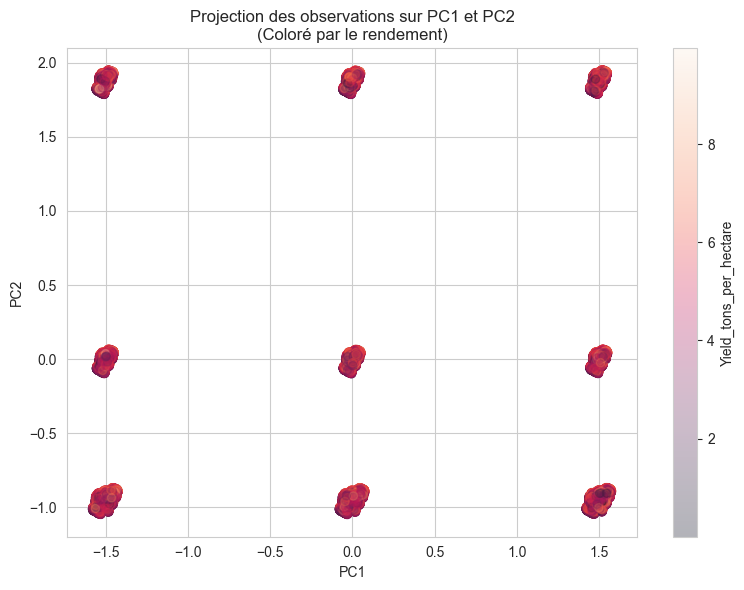

In [81]:
# Projection des données sur les 2 premières composantes
X_pca = pca.transform(X_scaled)
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

plt.figure(figsize=(8,6))
scatter = plt.scatter(pc1, pc2, c=y, alpha=0.3)
plt.colorbar(scatter, label="Yield_tons_per_hectare")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection des observations sur PC1 et PC2\n(Coloré par le rendement)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Etape 2 

In [32]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999769 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  999769 non-null  object 
 1   Soil_Type               999769 non-null  object 
 2   Crop                    999769 non-null  object 
 3   Rainfall_mm             999769 non-null  float64
 4   Temperature_Celsius     999769 non-null  float64
 5   Fertilizer_Used         999769 non-null  int64  
 6   Irrigation_Used         999769 non-null  int64  
 7   Weather_Condition       999769 non-null  object 
 8   Days_to_Harvest         999769 non-null  int64  
 9   Yield_tons_per_hectare  999769 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 83.9+ MB


In [33]:
target_col = "Yield_tons_per_hectare"

In [34]:
feature_cols = [col for col in crop_yield.columns if col != target_col]

X = crop_yield[feature_cols]
y = crop_yield[target_col]

In [35]:
numeric_features = [
    "Rainfall_mm",
    "Temperature_Celsius",
    "Fertilizer_Used",
    "Irrigation_Used",
    "Days_to_Harvest",
]

categorical_features = [
    "Region",
    "Soil_Type",
    "Crop",
    "Weather_Condition",
]


In [36]:
cols_order = numeric_features + categorical_features + [target_col]
crop_clean = crop_yield[cols_order].copy()

crop_clean.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Region,Soil_Type,Crop,Weather_Condition,Yield_tons_per_hectare
0,897.077239,27.676966,0,1,122,West,Sandy,Cotton,Cloudy,6.555816
1,992.673282,18.026142,1,1,140,South,Clay,Rice,Rainy,8.527341
2,147.998025,29.794042,0,0,106,North,Loam,Barley,Sunny,1.127443
3,986.866331,16.644190,0,1,146,North,Sandy,Soybean,Rainy,6.517573
4,730.379174,31.620687,1,1,110,South,Silt,Wheat,Cloudy,7.248251


In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna
import mlflow
import mlflow.sklearn
import os

C:\Users\yacin\Desktop\DATA SCIENCE OPENCLASSROOMS\Projet 12\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
os.makedirs("data", exist_ok=True)
crop_clean.to_csv("data/crop_yield_cleaned.csv", index=False)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
X_train.shape, X_test.shape

((799815, 9), (199954, 9))

In [41]:
# Pipeline numérique
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Pipeline catégoriel
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine les deux
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [78]:
#integration mlflow

In [ ]:
#ajouter un test de base avant optuna

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# 1. Modèle Random Forest baseline
# -----------------------------
rf_baseline2 = RandomForestRegressor(
    n_estimators=100,        # valeur par défaut raisonnable
    max_depth=None,          # pas de contrainte
    max_features="sqrt",     # défaut sklearn
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# 2. Pipeline complet
# -----------------------------
pipeline_rf_baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf_baseline2)
])

# -----------------------------
# 3. Entraînement
# -----------------------------
pipeline_rf_baseline.fit(X_train, y_train)

# -----------------------------
# 4. Prédictions
# -----------------------------
y_pred_rf = pipeline_rf_baseline.predict(X_test)

# -----------------------------
# 5. Évaluation
# -----------------------------
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("[Random Forest - baseline]")
print(f"RMSE = {rmse_rf:.3f}")
print(f"MAE  = {mae_rf:.3f}")
print(f"R²   = {r2_rf:.3f}")


[Random Forest - baseline]
RMSE = 0.524
MAE  = 0.418
R²   = 0.904


In [83]:
def objective(trial: optuna.Trial):

    # -------- 1. Définition de l’espace d’hyperparamètres ----------
    n_estimators = trial.suggest_int("n_estimators", 50, 150, step=25)
    max_depth = trial.suggest_int("max_depth", 5, 15)
    max_features = trial.suggest_categorical("max_features", ["sqrt"])  # on fixe
    min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 3)


    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # -------- 2. Pipeline complet ----------
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", rf_model)
    ])

    # -------- 3. Entraînement ----------
    model_pipeline.fit(X_train, y_train)

    # -------- 4. Évaluation (on optimise la RMSE) ----------
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    # -------- 5. Logging MLflow ----------
    mlflow.set_experiment("crop_yield_optuna_rf")

    with mlflow.start_run(run_name=f"trial_{trial.number}", nested=True):
        # Log hyperparams
        mlflow.log_params({
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "max_features": max_features,
            "min_samples_split": min_samples_split,
            "min_samples_leaf": min_samples_leaf,
        })
        # Log métrique
        mlflow.log_metric("RMSE", rmse)

        # Log du modèle complet
        mlflow.sklearn.log_model(model_pipeline, artifact_path="model")

    # Optuna cherche à MINIMISER la valeur retournée
    return rmse

In [84]:
study = optuna.create_study(
    direction="minimize",
    study_name="rf_crop_yield_study"
)

study.optimize(objective, n_trials=15, show_progress_bar=True)

[I 2025-11-28 16:01:37,607] A new study created in memory with name: rf_crop_yield_study


  0%|          | 0/15 [00:00<?, ?it/s]

2025/11/28 16:01:51 INFO mlflow.tracking.fluent: Experiment with name 'crop_yield_optuna_rf' does not exist. Creating a new experiment.
2025/11/28 16:01:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:01:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:01:57,467] Trial 0 finished with value: 0.6145155843249668 and parameters: {'n_estimators': 125, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6145155843249668.


2025/11/28 16:02:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:02:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:02:15,653] Trial 1 finished with value: 0.637812126377274 and parameters: {'n_estimators': 150, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6145155843249668.


2025/11/28 16:02:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:02:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:02:31,828] Trial 2 finished with value: 0.71688239517311 and parameters: {'n_estimators': 150, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6145155843249668.


2025/11/28 16:02:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:02:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:02:44,853] Trial 3 finished with value: 0.6399412011845214 and parameters: {'n_estimators': 100, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6145155843249668.


2025/11/28 16:02:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:02:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:02:53,431] Trial 4 finished with value: 0.5698008291307867 and parameters: {'n_estimators': 50, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.5698008291307867.


2025/11/28 16:03:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:03:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:03:04,155] Trial 5 finished with value: 0.9732349301817711 and parameters: {'n_estimators': 125, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.5698008291307867.


2025/11/28 16:03:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:03:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:03:16,213] Trial 6 finished with value: 0.5526737552420607 and parameters: {'n_estimators': 75, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.5526737552420607.


2025/11/28 16:03:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:03:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:03:29,623] Trial 7 finished with value: 0.7842815066083882 and parameters: {'n_estimators': 125, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 6 with value: 0.5526737552420607.


2025/11/28 16:03:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:03:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:03:36,864] Trial 8 finished with value: 0.7609013177276116 and parameters: {'n_estimators': 50, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 6 with value: 0.5526737552420607.


2025/11/28 16:03:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:03:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:03:48,073] Trial 9 finished with value: 0.6136896974145941 and parameters: {'n_estimators': 75, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 6 with value: 0.5526737552420607.


2025/11/28 16:03:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:04:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:04:00,380] Trial 10 finished with value: 0.5526737552420607 and parameters: {'n_estimators': 75, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.5526737552420607.


2025/11/28 16:04:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:04:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:04:12,825] Trial 11 finished with value: 0.5526737552420607 and parameters: {'n_estimators': 75, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.5526737552420607.


2025/11/28 16:04:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:04:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:04:24,609] Trial 12 finished with value: 0.5710130693375541 and parameters: {'n_estimators': 75, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.5526737552420607.


2025/11/28 16:04:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:04:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:04:39,982] Trial 13 finished with value: 0.5528905320319523 and parameters: {'n_estimators': 100, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.5526737552420607.


2025/11/28 16:04:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 16:04:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[I 2025-11-28 16:04:51,291] Trial 14 finished with value: 0.589818350079847 and parameters: {'n_estimators': 75, 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.5526737552420607.


In [85]:
print("Best RMSE:", study.best_value)
print("Best params:", study.best_params)

Best RMSE: 0.5526737552420607
Best params: {'n_estimators': 75, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 3}


In [87]:
best_params = study.best_params

In [89]:
best_rf = RandomForestRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)

best_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_rf)
])

best_pipeline.fit(X_train, y_train)

y_pred_best = best_pipeline.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best RMSE : {rmse_best:.3f}")
print(f"Best MAE  : {mae_best:.3f}")
print(f"Best R2   : {r2_best:.3f}")

Best RMSE : 0.553
Best MAE  : 0.441
Best R2   : 0.894


In [95]:
from mlflow.models import infer_signature

# 1. Exemple pour la signature
X_sample = X_train.head(100)
y_sample_pred = best_pipeline.predict(X_sample)
signature = infer_signature(X_sample, y_sample_pred)

mlflow.set_experiment("crop_yield_optuna_rf")

# 2. Run MLflow propre pour le best model
with mlflow.start_run(run_name="best_rf_model") as run:
    # log des hyperparamètres finaux
    mlflow.log_params(best_params)

    # log des métriques finales
    mlflow.log_metric("RMSE", rmse_best)
    mlflow.log_metric("MAE", mae_best)
    mlflow.log_metric("R2", r2_best)

    # log du modèle (pipeline complet)
    mlflow.sklearn.log_model(
        best_pipeline,
        artifact_path="model",
        input_example=X_sample.head(1),
        signature=signature,
    )

    # URI du modèle loggé dans ce run
    model_uri = f"runs:/{run.info.run_id}/model"

# 3. Enregistrement dans le Model Registry
mlflow.register_model(
    model_uri=model_uri,
    name="crop_yield_best_rf"
)

C:\Users\yacin\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/11/28 16:28:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Registered model 'crop_yield_best_rf' already exists. Creating a new version of this model...
2025/11/28 16:28:54 WARNING mlflow.tracking._model_registry.fluent: Run with id 74091606e94141d88d962ba93ecac73c has no artifacts at artifact path 'model', registering model based on models:/m-31a682d4a3bb49cc8fb51b0cfa72ad44 instead
Created version '2' of model 'crop_yield_best_rf'.


<ModelVersion: aliases=[], creation_timestamp=1764343734019, current_stage='None', deployment_job_state=None, description=None, last_updated_timestamp=1764343734019, metrics=[<Metric: dataset_digest=None, dataset_name=None, key='MAE', model_id='m-31a682d4a3bb49cc8fb51b0cfa72ad44', run_id='74091606e94141d88d962ba93ecac73c', step=0, timestamp=1764343731355, value=0.4411508742487393>,
 <Metric: dataset_digest=None, dataset_name=None, key='R2', model_id='m-31a682d4a3bb49cc8fb51b0cfa72ad44', run_id='74091606e94141d88d962ba93ecac73c', step=0, timestamp=1764343731361, value=0.8936797577311595>,
 <Metric: dataset_digest=None, dataset_name=None, key='RMSE', model_id='m-31a682d4a3bb49cc8fb51b0cfa72ad44', run_id='74091606e94141d88d962ba93ecac73c', step=0, timestamp=1764343731348, value=0.5526737552420607>], model_id='m-31a682d4a3bb49cc8fb51b0cfa72ad44', name='crop_yield_best_rf', params={'max_depth': '15',
 'max_features': 'sqrt',
 'min_samples_leaf': '3',
 'min_samples_split': '3',
 'n_estimator

In [1]:
#test du 2eme modele

In [46]:
from sklearn.linear_model import LinearRegression
# Modèle Linear Regression
lin_reg = LinearRegression(fit_intercept=True)

pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lin_reg)
])

# Entraînement
pipeline_lr.fit(X_train, y_train)

# Prédictions
y_pred_lr = pipeline_lr.predict(X_test)

# Métriques (attention à ta version de sklearn pour RMSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"[LinearRegression] RMSE={rmse_lr:.3f} | MAE={mae_lr:.3f} | R²={r2_lr:.3f}")

[LinearRegression] RMSE=0.499 | MAE=0.398 | R²=0.913


In [98]:
mlflow.set_experiment("crop_yield_linear")  
# Exemple pour la signature
X_sample = X_train.head(100)
y_sample_pred = pipeline_lr.predict(X_sample)
signature_lr = infer_signature(X_sample, y_sample_pred)

with mlflow.start_run(run_name="linear_regression_baseline") as run:
    # Hyperparamètres (simples)
    mlflow.log_param("model", "LinearRegression")
    mlflow.log_param("fit_intercept", True)

    # Métriques
    mlflow.log_metric("RMSE", rmse_lr)
    mlflow.log_metric("MAE", mae_lr)
    mlflow.log_metric("R2", r2_lr)

    # Log du modèle
    mlflow.sklearn.log_model(
        pipeline_lr,
        artifact_path="model",
        input_example=X_sample.head(1),
        signature=signature_lr,
    )

    model_uri_lr = f"runs:/{run.info.run_id}/model"

# Optionnel : l'ajouter aussi au Model Registry
mlflow.register_model(
    model_uri=model_uri_lr,
    name="crop_yield_linear_regression"
)

2025/11/28 16:34:39 INFO mlflow.tracking.fluent: Experiment with name 'crop_yield_linear' does not exist. Creating a new experiment.
C:\Users\yacin\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/11/28 16:34:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Pl

Successfully registered model 'crop_yield_linear_regression'.
2025/11/28 16:34:41 WARNING mlflow.tracking._model_registry.fluent: Run with id 0cd3f4291adf4cc3bc9a18415659dd6e has no artifacts at artifact path 'model', registering model based on models:/m-8276067599424ee98ab24e4d2642bf1f instead
Created version '1' of model 'crop_yield_linear_regression'.


<ModelVersion: aliases=[], creation_timestamp=1764344081477, current_stage='None', deployment_job_state=None, description=None, last_updated_timestamp=1764344081477, metrics=[<Metric: dataset_digest=None, dataset_name=None, key='MAE', model_id='m-8276067599424ee98ab24e4d2642bf1f', run_id='0cd3f4291adf4cc3bc9a18415659dd6e', step=0, timestamp=1764344079447, value=0.39833858085913776>,
 <Metric: dataset_digest=None, dataset_name=None, key='R2', model_id='m-8276067599424ee98ab24e4d2642bf1f', run_id='0cd3f4291adf4cc3bc9a18415659dd6e', step=0, timestamp=1764344079454, value=0.9132337163868854>,
 <Metric: dataset_digest=None, dataset_name=None, key='RMSE', model_id='m-8276067599424ee98ab24e4d2642bf1f', run_id='0cd3f4291adf4cc3bc9a18415659dd6e', step=0, timestamp=1764344079441, value=0.4992710231238678>], model_id='m-8276067599424ee98ab24e4d2642bf1f', name='crop_yield_linear_regression', params={'fit_intercept': 'True', 'model': 'LinearRegression'}, run_id='0cd3f4291adf4cc3bc9a18415659dd6e', r

In [87]:
model = pipeline_lr.named_steps["model"]  
coefs = model.coef_  
features = pipeline_lr[:-1].get_feature_names_out()

importance = pd.DataFrame({"feature": features, "coef": coefs})
importance["abs_coef"] = importance["coef"].abs()
importance.sort_values("abs_coef", ascending=False).head(15)

,feature,coef,abs_coef
0,num__Rainfall_mm,1.297351,1.297351
2,num__Fertilizer_Used,0.750525,0.750525
3,num__Irrigation_Used,0.599615,0.599615
1,num__Temperature_Celsius,0.143657,0.143657
14,cat__Soil_Type_Silt,-0.002437,0.002437
10,cat__Soil_Type_Clay,0.002371,0.002371
13,cat__Soil_Type_Sandy,0.001513,0.001513
6,cat__Region_North,0.001468,0.001468
17,cat__Crop_Maize,-0.001454,0.001454
15,cat__Crop_Barley,0.001387,0.001387


In [57]:
#enregistrement du meilleur modele : lin reg

In [47]:
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(pipeline_lr, "models/best_linear_regression.joblib")

['models/best_linear_regression.joblib']

In [66]:
X

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110
...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,0,0,Sunny,76
999996,South,Chalky,Barley,932.991383,39.661039,1,0,Rainy,93
999997,North,Peaty,Cotton,867.362046,24.370042,1,0,Cloudy,108
999998,West,Silt,Wheat,492.812857,33.045505,0,0,Sunny,102


In [65]:
X['Crop'].value_counts()

Crop
Maize      166785
Rice       166754
Barley     166727
Wheat      166640
Cotton     166548
Soybean    166315
Name: count, dtype: int64